<a href="https://colab.research.google.com/github/aachellis/machine-learning-practices/blob/main/training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Normal Equation

In [1]:
# Generate some linear-looking data to test the equation on
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

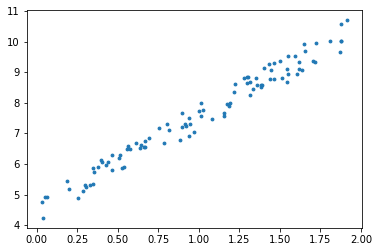

In [6]:
# Getting the distribution of data in respect to the independent variabel by scatter plot.
import matplotlib.pyplot as plt

plt.scatter(X, y, s = 8)
plt.show()

In [8]:
# Compute thetha hat using the normal equation
# Add X0 = 1 in each instance
X_b = np.c_[np.ones((100, 1)), X]
thetha_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
thetha_best

array([[4.62347516],
       [2.95660276]])

In [9]:
# Make predictions using thetha hat
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(thetha_best) 
y_predict

array([[ 4.62347516],
       [10.53668069]])

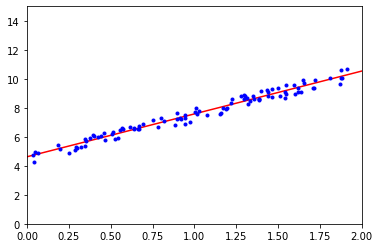

In [11]:
# Plot the model's prediction
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [13]:
# Performing Linear Regression using scikit learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.62347516]), array([[2.95660276]]))

The linear regression class is base on Least Squares method. Lets directly use that.

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.62347516],
       [2.95660276]])

# Gradient Descent

In [18]:
# Quick implementation of the Gradient Descent Step
eta = 0.1 # Learning Rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # Random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.62347516],
       [2.95660276]])

Implementing Stocastic gradient descent using a simple learning schedule.

In [19]:
n_epochs = 50
t0, t1 = 5, 50  # Learning schedules hyper parameters

def learning_schedules(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1) # Random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedules(epoch * m + i)
        theta = theta - eta * gradients
    
theta

array([[4.6097244 ],
       [2.97526025]])

Using sklearn sgd regressor.

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.59168336]), array([2.99735022]))